<CENTER><H1>WRANGLE OPEN STREET MAP DATA</H1></CENTER>

## INTRODUCTION

<p> Area i choose to work for this project is <b>chennai,india</b> . It is one of the most famous and the crowded city in India. Reason i choose chennai is beacuse it is my hometown and the knowledge i have about chennai can help me to validate the data. As chennai is one of the famous metero area, it is available for download in mapzen </p>

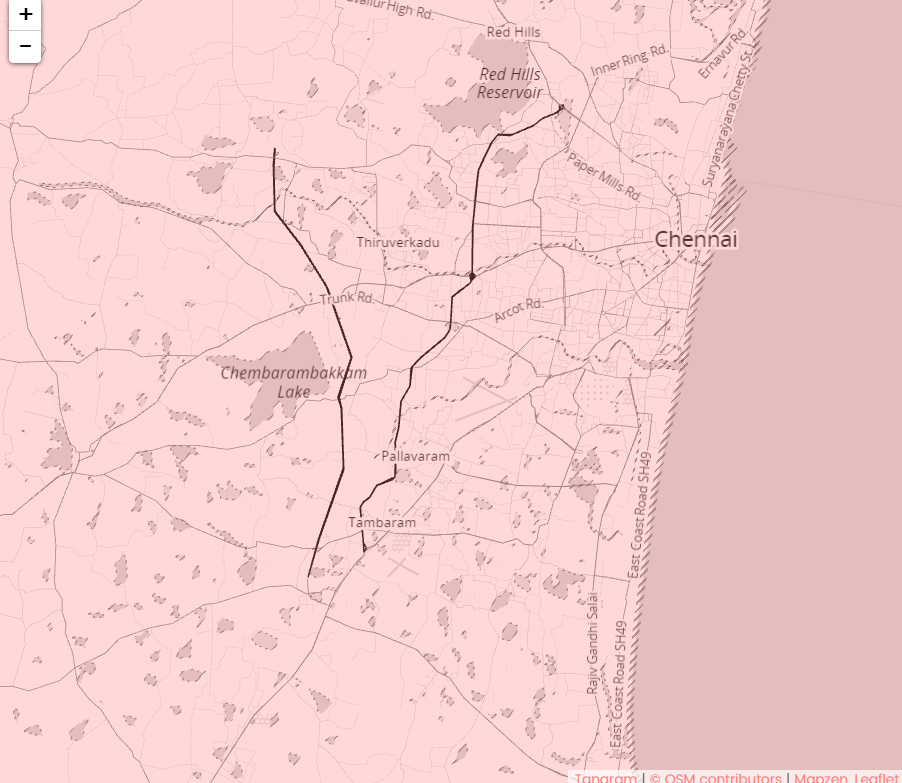

## Overview about CHENNAI

<p>Chennai district spans over an area of 178.20 sq km. Geographically, it lies between 12° 9' and 13° 9' latitude and 80° 12' and 80° 19' longitude. It is located on the coast of Bay of Bengal at the north-east end of Tamil Nadu. The Chennai Metropolitan Area(CMA) is the second most populous, and the second largest metropolitan area in India and is the 22nd most populous city in Asia or the 40th most populous city in the world. The CMA falls in three Districts of the Tamil Nadu State viz. Chennai District, part of Thiruvallur District, and part of Kancheepuram District. </P>
<P> MAPZEN URL: https://mapzen.com/data/metro-extracts/metro/chennai_india/ <p>

## Overview of Data

To clean the data it is best to know what are all present in the data.

In [1]:
import xml.etree.cElementTree as ET #importing the xml parser as ET
import re # Importing re module for the regular expression
from collections import defaultdict # importing the default dict from the collection
import os #importing os 

In [2]:
osm_file ='chennai_india.osm'
sample_file ='chennaisample.osm'

In [3]:
def calculate_MB(filesize):
    '''Fuction to calculate the file size in MB
    It gets the filesize in bytes and divide it by 1024 * 1024 to convert it into MB'''
    size = filesize / (1024 * 1024)
    return size
print 'size of osm_file is {} MB'.format(calculate_MB(os.path.getsize(osm_file)))

size of osm_file is 390 MB


Chennai file that i am going to use for this project is about <b> 409 </b> Mega byte.

In [4]:
def main_tags(filename):
    '''To count the tags in the file'''
    tags ={}
    for event,elem in ET.iterparse(filename):
        if elem.tag not in tags.keys():
            tags[elem.tag] = 1
        else:
            tags[elem.tag] +=1
    print tags
main_tags(osm_file)
#main_tags(sample_file)  

{'node': 1835126, 'nd': 2275331, 'bounds': 1, 'member': 3463, 'tag': 467149, 'relation': 947, 'way': 411288, 'osm': 1}


<p>This functiom counts the unique tags present in the chennai osm file.<p>
<li> node : 1835126 </li>
<li> nd : 2275331 </li>
<li> bounds : 1 </li>
<li> member : 3463 </li>
<li> tag : 467149 </li>
<li> relation : 947 </li>
<li> way : 411288 </li>
<li> osm : 1</li>
From the xml file , i found that there are different attributes present inside the tag. It is good to know the attributes present inside the tag so that i can get the full overview of the data. It will be helpful for the exploration of the data.

In [5]:
def count_tags(filename):
    '''It takes file as the input 
    counts the different attributes present in the tag 
    returns the tags and their counts in the ascending order'''
    ele= {}
    for event,elem in ET.iterparse(filename):
        if elem.tag == 'tag' :
            if elem.attrib['k'] not in ele.keys():
                ele[elem.attrib['k']] = 1
            else:
                ele[elem.attrib['k']] += 1
    return sorted(ele.items(), key =lambda value: value[1])
tags = count_tags(osm_file)
#tags = count_tags(sample_file)
print tags

[('apartment', 1), ('fair_trade', 1), ('naptan:AtcoCode', 1), ('icao', 1), ('contact:facebook', 1), ('contact:google_plus', 1), ('addr', 1), ('leaf_type', 1), ('fuel:e85', 1), ('OtherName', 1), ('contact:twitter', 1), ('service:bicycle:retail', 1), ('seamark:light:category', 1), ('name:pl', 1), ('diplomatic:sending_country', 1), ('payment:bankaxess', 1), ('payment:electronic_purses', 1), ('tower:construction', 1), ('club', 1), ('payment:cryptocurrencies', 1), ('male', 1), ('water_1', 1), ('building:flats', 1), ('ISO3166-2', 1), ('iata', 1), ('beauty', 1), ('payment:diners_club', 1), ('fuel:1_25', 1), ('wikipedia:hi', 1), ('seamark:light:sequence', 1), ('tram', 1), ('name_2', 1), ('name_3', 1), ('observatory:type', 1), ('name_4', 1), ('naptan:Bearing', 1), ('seamark:radar_transponder:group', 1), ('name:am', 1), ('diesel', 1), ('service:bicycle:repair', 1), ('organic', 1), ('seamark:cable_submarine:category', 1), ('payment:visa_debit', 1), ('second_hand', 1), ('toilets:wheelchair', 1), (

Here i sorted the unique attributes present inside the tag "<B> tag </B>" Building is the most repeated key with 354889 counts. There are also some attributes values that are not repeated. Some of the most repeated attributes and their counts are,
<li> building - 354889 </li>
<li> highway - 48562 </li>
<li> name - 16177 </li>
<li> power - 6616 </li>
<li> amenity - 3727 </li>

## Problems encountered in the map

##### BUILDINGS

<li> chennai city day has different value for the building. Most of the building has 'yes' as their value but some have different values like post_office and university to denote what kind of the building it is. One of the measure of data quality is uniformity. Chennai data is not having the same unit for building. There are two kinds of the values are used for the building
<center>
<li>one denotes type of the building </li>
<li>other simply answer yes to denote it is a building.</li>
</center>
Since i can't find out what kind of building for each one, i am changing everything to 'yes' in <b>building_uniformity.py</b> to achieve uniformity of the data</li>

###### POSTAL CODES

<li>Chennai postal codes are starts with <b>600</b> and it is a <b>six</b> digit code. The problem here is there is a gap after 600 for some codes and some codes have comma or fullstop at the end.
<p>some of the example of the postal codes for chennai city are:
<center> <li>600001</li><li>600098</li><li>600107</li></center>
<p>Another problem here is, some users have entered a extra zero in the middle by mistake and made it as a seven digit postal code. </p>
<p> Here i am going to check whether it starts with 600 and  strip all the extra characters present in the postal codes and slice the postal code to remove the extra zero in <b>postal_codes.py</b> </p>
This is will do the following changes :
<center>
<li> 600 002 -> 600002</li>
<li>600104, -> 600104 </li>
<li> 600567. ->600567 </li>
<li> 6000018 -> 600018 </li>
</center>
For the postal_codes that are not starts with 600 and less than 6 digits they are set it to 600001 to denote that postal code belongs to chennai.
For example:
<center>
<li>500356 -> 600001</li>
<li>6003 -> 600001</li>
</center>

##### STREET NAME :

Here, I am going to check the different street names that are entered by the user in <b> auditing_streets.py</b>

In [6]:
street_type_re = re.compile(r'\S+\.?$', re.IGNORECASE)
street_types = defaultdict(int)

def audit_street_type(street_types, street_name):
    m = street_type_re.search(street_name)
    if m:
        street_type = m.group()

        street_types[street_type] += 1

def print_sorted_dict(d):
    keys = d.keys()
    keys = sorted(keys, key=lambda s: s.lower())
    for k in keys:
        v = d[k]
        print "%s: %d" % (k, v) 

def is_street_name(elem):
    return (elem.tag == "tag") and (elem.attrib['k'] == "addr:street")

def audit(filename):
    for event, elem in ET.iterparse(filename):
        if is_street_name(elem):
            audit_street_type(street_types, elem.attrib['v'])    
    print_sorted_dict(street_types) 
audit(osm_file)

(Broadway): 1
(Pudur): 1
,kanchipuram: 1
600: 1
600037: 1
600040: 1
600042: 1
600050: 1
600101: 1
Adambakkam: 1
Adyar: 9
Adyar,: 2
Agraharam: 1
airborne: 1
Alwarpet: 2
ambattur: 1
Ambattur: 1
Arumbakkam: 1
as: 1
Avadi: 1
Avadi,: 1
Ave: 9
AVENUE: 2
Avenue: 33
birds: 1
Block: 1
Bridge: 1
camp: 1
campus: 1
chavadi: 1
Chemencheri: 2
Chennai: 10
Chetpet: 1
Chithalapakkam: 1
Choolai: 2
Choolaimedu: 1
Coimbet: 1
Colony: 5
colony: 1
Complex: 1
East: 5
East,: 1
Egmore: 1
Ekkatuthangal: 1
Expressway: 2
Extension: 4
Extn: 1
EXTN: 1
Extn.: 1
Goparasanallur,: 1
Gramam: 1
Guduvanchery,: 1
Guindy: 6
Hasthinapuram: 1
Highway: 7
HO: 1
Hotel: 1
II: 1
III: 4
India: 3
J.N.ROAD: 1
Jafferkhanpet: 1
Kancheepuram: 3
Kanchipuram: 3
Karanai: 1
Kilpauk: 2
Kodambakkam: 2
Kodungaiyur: 1
Kolapakkam: 2
Kolathur: 1
Korattur: 1
Kotturpuram: 1
Koyambedu: 14
krishnapuram: 1
LANE: 1
Lane: 8
Lights: 1
Luz: 1
Madambakkam: 3
Madipakkam: 1
mainroad: 1
Mambalam: 3
manapakkam: 1
manthagudipatty: 1
Medavakkam: 1
Meenambakkam: 2

There are some inconsistency in the streenames like users have entered ave, AVENUE for avenue. It denotes same thing but every users use different version to denote it.This can be overcome by creating the mapping dictionary to update those street names.In <b>mapping.py</b> i updated 

<ul>
<li> Ave -> Avenue</li>
<li>AVENUE -> Avenue </li>
<li> colony -> Colony </li>
<li>Extn -> Extension </li>
<li>EXTN -> Extension </li>
<li>LANE -> Lane </li>
<li>nagar -> Nagar </li>
<li>Rd -> Road </li>
<li>ROAD ->Road </li>
<li>road -> Road </li>
<li>St -> Street </li>
<li>street -> Street </li>
</ul>

## CONNECTING TO DATABASE

Here , i am converting xml to csv format and importing as a table into sqlite database. My xml file chenna_india.osm is converted into 5 csv files in <b>converting_to_csv.py </b>
<ol>
<li> nodes.csv</li>
<li>nodes_tags.csv</li>
<li>ways.csv</li>
<li>ways_tags.csv</li>
<li>ways_nodes.csv</li>
</ol>

In [7]:
print 'size of nodes.csv is {} MB'.format(calculate_MB(os.path.getsize('nodes.csv')))
print 'size of nodes_tags.csv is {} MB'.format(calculate_MB(os.path.getsize('nodes_tags.csv')))
print 'size of ways.csv is {} MB'.format(calculate_MB(os.path.getsize('ways.csv')))
print 'size of ways_tags.csv is {} MB'.format(calculate_MB(os.path.getsize('ways_tags.csv')))
print 'size of ways_nodes.csv is {} MB'.format(calculate_MB(os.path.getsize('ways_nodes.csv')))


size of nodes.csv is 148 MB
size of nodes_tags.csv is 1 MB
size of ways.csv is 24 MB
size of ways_tags.csv is 14 MB
size of ways_nodes.csv is 54 MB


#### importing to database

This csv files are imported into the sqlite database named chennai.db using the following steps
<ol>
<li>change the mode to csv using <I> .mode csv </I></li>
<li> Import the csv into the table using <i>.import csvfilename.csv tablename </i>. This will create the table in the database and assign the csv header as the table column name, each line from the csv file is assign to the rows of the table.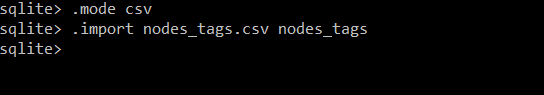


## exploration 

After csv files are imported in database, it is explored to know about chennai city in <b> query.py </b>
<B> Number of nodes in the nodes.csv </B><br>
select count(*) from nodes;
<B>Output </B>
1835126
<B>Number of ways in ways.csv </B>
<p>select count(*) from ways;<p>
<B>Output </B>
411288
<B>Top 3 user to contribute data for chennai in openstreetmap </B> <br>
select user,count(*) as num from nodes group by user order by num desc limit 3;
<B> Output </B>
<ol>
<li>maheshrkm - 159888 </li>
<li>PlaneMad - 86450 </li>
<li>venkatkotha - 82171 </li>
</ol>


<b> Top 5 amenities in chennai </b><br>
select value,count(*) as num from nodes_tags where key ='amenity' group by value order by num desc limit 5;
<br><b> Output </b>
<ol>
<li> resturant - 331</li>
<li>place of workship - 326 </li>
<li> ATM -192 </li>
<li> Bank - 169 </li>
<li> School - 148 </li>
</ol>


<b> Top 5 different kinds of shops in chennai </b> <br>
select value,count(*) as num from nodes_tags where key ='shop' group by value order by num desc limit 5;
<br> <b> output </b>
<ol>
<li> super market- 113 </li>
<li> convenience- 49</li>
<li> bakery - 44 </li>
<li> cloths - 37 </li>
<li> department store - 22</li>
</ol>


<b> Top 5 different kinds of cuisine in chennai </b> <br>
select value,count(*) as num from nodes_tags where key ='cuisine' group by value order by num desc limit 5;
<br><b> Output </b> 
<br><ol>
<li> regional - 39</li>
<li> indian - 36 </li>
<li> pizza - 11</li>
<li> chinease - 9</li>
<li> vegetarian - 8</li>
</ol>

In [8]:
import sqlite3
def number():
    result = cur.execute("select count(*) from nodes;")
    return result.fetchall()
def way():
    result = cur.execute("select count(*) from ways;")
    return result.fetchall()
def unique():
    result = cur.execute("select user,count(*) as num from nodes group by user order by num desc limit 3;")
    return result.fetchall()
def amenity():
    result = cur.execute("select value,count(*) as num from nodes_tags where key ='amenity' group by value order by num desc limit 5;")
    return result.fetchall()
def shop():
    result = cur.execute("select value,count(*) as num from nodes_tags where key ='shop' group by value order by num desc limit 5;")
    return result.fetchall()
def cuisine ():
    result=cur.execute("select value,count(*) as num from nodes_tags where key ='cuisine' group by value order by num desc limit 5;")
    return result.fetchall()
conn = sqlite3.connect("chennai.db")
cur = conn.cursor()
print "nodes ",number()
print "ways",way()
print "unique", unique()
print "amenity",amenity()
print "shop",shop()
print "cuisine", cuisine()

conn.close()

nodes  [(1835126,)]
ways [(411288,)]
unique [(u'maheshrkm', 159888), (u'PlaneMad', 86450), (u'venkatkotha', 82171)]
amenity [(u'restaurant', 331), (u'place_of_worship', 326), (u'atm', 192), (u'bank', 169), (u'school', 148)]
shop [(u'supermarket', 113), (u'convenience', 49), (u'bakery', 44), (u'clothes', 37), (u'department_store', 22)]
cuisine [(u'regional', 39), (u'indian', 36), (u'pizza', 11), (u'chinese', 9), (u'vegetarian', 8)]


##  Conclusion

In this project i cleaned the data that are necessary to conclude but there are lot of mistakes still exist in data. Most of the errors in this are human made errors . It can be overcome by cleaning the data.
<h3> Ideas </h3>
When i checked for tourism in this data i found most of that data as irrelevent and top tourist spots are not entered.
There are also some local slang words are used to denote the data. My suggestion is to cross reference the data present here with someother data for chennai city. So if the place or the area was wrongly tagged that can be removed by this way. We can also follow some rules in entering the data so there will be a uniformity with the data , most of the problems can be removed by this way.For improving the tourism data , resturants and hotels should be encouraged to enter their details in the open street map. This way both the tourist and people can be benefitted.
### Benefits :
<li>Encouraging hotel and resturents to update their own information helps their business as well as helps the people to find their building easily .</li>
<li>Setting rules to enter the data makes the data uniform. It makes the data less dirty. </li>
<li> encouraging users to use the common language helps people who don't know the local language </li>
<H3>Anticipated problem :</H3>
<li> As any one can alter the information provided , Business rivals can use this as an opportunity to provide the wrong information </li>
<li> From the user's point of view following the rules in entering the data is time consuming , so most of the users won't we willing to contribute.</li>
<li>cross referencing the data with the other data takes a lot of human effort. </li>


### Reference:

1.https://stackoverflow.com/questions/613183/sort-a-python-dictionary-by-value
2.https://en.wikipedia.org/wiki/Chennai_Metropolitan_Area

## FILES

1.<b>building_uniformity.py</b> - python file to change the building attribute.<br>
2.<b>postal_codes.py</b> - python file to rectify errors in the postal code.<br>
3.<b>auditing_streets.py</b> - python file to audit the different street types present in the data.<br>
4.<b>mapping.py</b> - python file to change the inconsistency in the street name.<br>
5.<b>converting_to_csv.py</b> - convert the data into csv file<br>
6.<b>query.py</b> - file to query the data in the database.